In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')

In [12]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.5.0


In [23]:
# This program adds two numbers

num1 = 1.5
num2 = 6.3

# Add two numbers
sum = num1 + num2

# Display the sum
print('The sum of {0} and {1} is {2}'.format(num1, num2, sum))

The sum of 1.5 and 6.3 is 7.8


In [1]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

2022-03-23 22:01:52.463862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-23 22:01:52.463924: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-23 22:01:57.859437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-23 22:01:57.859534: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-23 22:01:57.859763: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (muhammadammar-Lenovo-ideapad-310-15ISK): /proc/driver/nvidia/version does not exist
2022-03-23 22:01:57.861343: I tensorfl

In [2]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)



NameError: name 'X' is not defined

In [10]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"Age": np.float64, "Fare": np.float64})

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

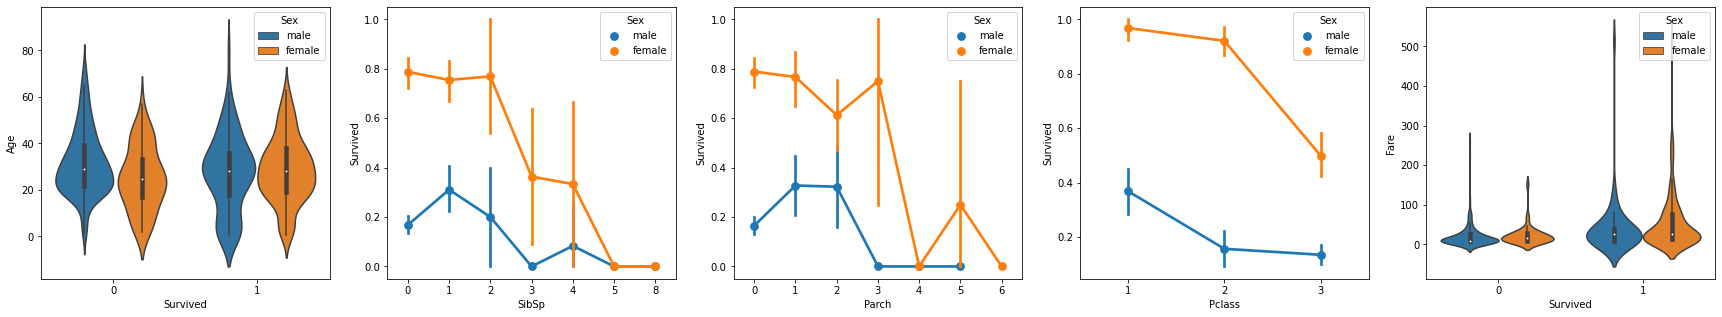

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=data, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=data, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=data, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=data, ax=axs[4])

In [ ]:
data.replace({'male': 1, 'female': 0}, inplace=True)


In [ ]:
data['Relatives'] = data.apply (lambda row: int((row['SibSp'] + row['Parch']) > 0), axis=1)
data.corr().abs()[["Survived"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Sex','Pclass','Age','Relatives','Fare']], data.Survived, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [10]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 112
Trainable params: 112
Non-trainable params: 0
__________________________________________________________

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11493376/11490434 [==============================] - 17s 1us/step


In [19]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [20]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data


2022-03-23 22:19:12.282661: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 156800000 exceeds 10% of free system memory.
2022-03-23 22:19:12.670696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-23 22:19:12.699222: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299965000 Hz


Epoch 1/2
776/782 [============================>.] - ETA: 0s - loss: 0.3406 - sparse_categorical_accuracy: 0.9040

2022-03-23 22:19:16.707205: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


782/782 [==============================] - 4s 4ms/step - loss: 0.3398 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.2005 - val_sparse_categorical_accuracy: 0.9390
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.1606 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.1359 - val_sparse_categorical_accuracy: 0.9607


In [21]:
history.history

{'loss': [0.3398391306400299, 0.16063374280929565],
 'sparse_categorical_accuracy': [0.9043400287628174, 0.9520400166511536],
 'val_loss': [0.2004552185535431, 0.13594666123390198],
 'val_sparse_categorical_accuracy': [0.9390000104904175, 0.9606999754905701]}

In [22]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
36/79 [============>.................] - ETA: 0s - loss: 0.1799 - sparse_categorical_accuracy: 0.9466

2022-03-23 22:19:59.718287: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


79/79 [==============================] - 0s 3ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9595
test loss, test acc: [0.13861161470413208, 0.9595000147819519]
Generate predictions for 3 samples
predictions shape: (3, 10)
